# **Question 2**

# (a)

x1.shape: (100, 2)
x2.shape: (100, 2)
y1.shape: (100, 1)
y2.shape: (100, 1)


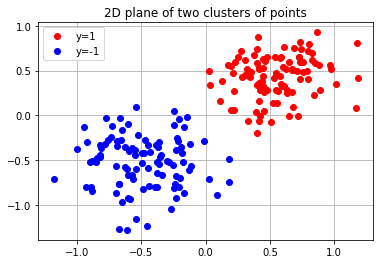

In [0]:
import numpy as np
import matplotlib.pyplot as plt
meanx1 = (0.5, 0.5)
covx1 = [[0.07, 0], [0, 0.07]]
x1 = np.random.multivariate_normal(meanx1, covx1, 100)
meanx2 = (-0.5, -0.5)
covx2 = [[0.07, 0], [0, 0.07]]
x2 = np.random.multivariate_normal(meanx2, covx2, 100)
print("x1.shape:" ,x1.shape)
print("x2.shape:" ,x2.shape)
plt.figure(1)
plt.title("2D plane of two clusters of points")
plt.plot(x1[:,0],x1[:,1],'ro',label="y=1")
plt.plot(x2[:,0],x2[:,1],'bo',label="y=-1")
plt.legend()
plt.grid()

y1 = np.random.normal(loc=1.0, scale=0.0, size=100)
y2 = np.random.normal(loc=-1.0, scale=0.0, size=100)
y1 = y1.reshape(y1.shape[0],1)
y2 = y2.reshape(y2.shape[0],1)
print("y1.shape:" ,y1.shape)
print("y2.shape:" ,y2.shape)

# (b)

In [0]:
def perception(x,y,epoch,learning_rate):
  import numpy as np
  import matplotlib.pyplot as plt
  pairs = np.concatenate((x, y), axis=1)
  #print("pairs.shape: ",pairs.shape,"pairs:")
  np.random.shuffle(pairs)
  #print(pairs)
  X = pairs[:,0:pairs.shape[1]-1]
  y = pairs[:,pairs.shape[1]-1:pairs.shape[1]]
  #print(X)
  #print(y)
  n = X.shape[0]
  d = X.shape[1]
  x0 = np.ones((n,1))
  X = np.hstack((x0,X))# add a column of 1 to the left of x matching for w0
  w = np.zeros(d+1)
  print("X.shape: ",X.shape," y.shape: ",y.shape," w.shape: ",w.shape)
  
  cost = []
  converge = False;
  for T in range(1,epoch+1):
    Lw = 0
    for i in range(n):
      if np.matmul(w,X[i].T)*y[i] <= 0 :
        Lw = Lw - np.matmul(w,X[i].T)*y[i]
        w = w - learning_rate*(-1)*y[i]*X[i]  
    cost.append(Lw)
    if (Lw == 0 and converge == False) :
      converge = True
      print("no change in epoch {} ".format(T))  
  
  plt.figure()
  plt.title("L(w) Variation with Epoch")
  iterations = range(1,epoch+1)
  plt.plot(iterations,cost,'r')
  plt.xlabel("epoch")
  plt.ylabel("L(w)")
  plt.grid()
  print("w: ",w)
  print("Last Loss L(w): ",cost[-1])

  y_pred = X@w.T
  y_pred[y_pred<0]=-1
  y_pred[y_pred>=0]=1
  
  acc = 0
  for i in range(n):
    if y_pred[i] == y[i]:
      acc += 1
  print("final accuracy: ", acc/200)
  return w

X.shape:  (200, 3)  y.shape:  (200, 1)  w.shape:  (3,)
no change in epoch 2 
w:  [0.         1.0992005  1.29950527]
Last Loss L(w):  0
final accuracy:  1.0


array([0.        , 1.0992005 , 1.29950527])

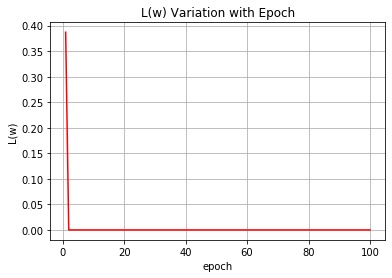

In [0]:
x = np.concatenate((x1, x2), axis=0)
y = np.concatenate((y1, y2), axis=0)

perception(x,y,100,1)

# (c)

X1.shape: (100, 2)
X2.shape: (100, 2)
Y1.shape: (100, 1)
Y2.shape: (100, 1)


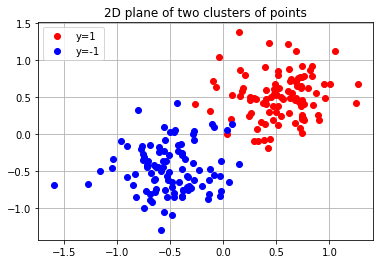

In [0]:
import numpy as np
import matplotlib.pyplot as plt
mean1 = (0.5, 0.5)
cov1 = [[0.09, 0], [0, 0.09]]
X1 = np.random.multivariate_normal(mean1, cov1, 100)
mean2 = (-0.5, -0.5)
cov2 = [[0.09, 0], [0, 0.09]]
X2 = np.random.multivariate_normal(mean2, cov2, 100)
print("X1.shape:" ,X1.shape)
print("X2.shape:" ,X2.shape)
plt.figure(1)
plt.title("2D plane of two clusters of points")
plt.plot(X1[:,0],X1[:,1],'ro',label="y=1")
plt.plot(X2[:,0],X2[:,1],'bo',label="y=-1")
plt.legend()
plt.grid()

Y1 = np.random.normal(loc=1.0, scale=0.0, size=100)
Y2 = np.random.normal(loc=-1.0, scale=0.0, size=100)
Y1 = Y1.reshape(Y1.shape[0],1)
Y2 = Y2.reshape(Y2.shape[0],1)
print("Y1.shape:" ,Y1.shape)
print("Y2.shape:" ,Y2.shape)

X.shape:  (200, 3)  y.shape:  (200, 1)  w.shape:  (3,)
w:  [-1.          5.90306856  5.65967229]
Last Loss L(w):  [2.39681691]
final accuracy:  0.985


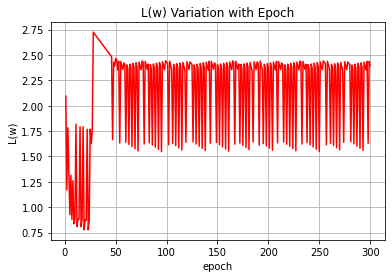

In [0]:
x = np.concatenate((X1, X2), axis=0)
y = np.concatenate((Y1, Y2), axis=0)
w = perception(x,y,300,1)

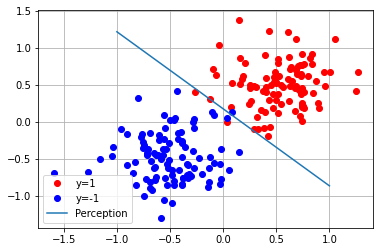

In [0]:
plt.figure()

plt.plot(X1[:,0],X1[:,1],'ro',label="y=1")
plt.plot(X2[:,0],X2[:,1],'bo',label="y=-1")
linex1 = [-1 , 1]
#boundary w0 + w1*x1 + w2*x2 = 0
linex2 = [(0.0 - w[0] - w[1]*linex1[0]) / w[2],(0.0 - w[0] - w[1]*linex1[1]) / w[2]]
plt.plot(linex1,linex2,label = "Perception")
plt.legend()
plt.grid()

# **help solve homework question 1 (b)**

X.shape:  (4, 3)  y.shape:  (4, 1)  w.shape:  (3,)
no change in epoch 2 
w:  [1. 1. 1.]
Last Loss L(w):  0
final accuracy:  0.02


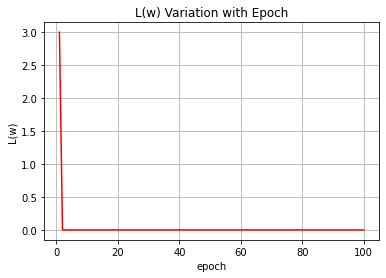

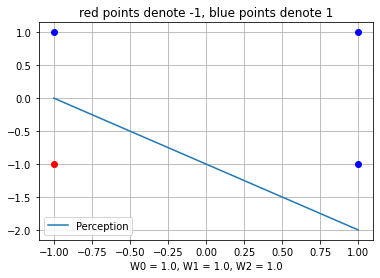

In [0]:
import matplotlib.pyplot as plt
import numpy as np

y = [[1],[1],[1],[-1]]
x = [[1,-1],[-1,1],[1,1],[-1,-1]]
x = np.array(x)
y = np.array(y)
w = perception(x,y,100,1)
plt.figure()
plt.title("red points denote -1, blue points denote 1")
plt.xlabel("W0 = {w0}, W1 = {w1}, W2 = {w2}".format(w0=w[0],w1=w[1],w2=w[2]))
for i in range(np.array(x).shape[0]):
  if ( y[i][0]== -1 ):
    plt.plot(x[i,0],x[i,1],'ro')
  if ( y[i][0]== 1 ):
    plt.plot(x[i,0],x[i,1],'bo')
linex1 = [-1 , 1]
#boundary w0 + w1*x1 + w2*x2 = 0
linex2 = [(0.0 - w[0] - w[1]*linex1[0]) / w[2],(0.0 - w[0] - w[1]*linex1[1]) / w[2]]
plt.plot(linex1,linex2,label = "Perception")
plt.legend()
plt.grid()

# **Question 4**

# (a)

#load dataset

In [0]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


#find representatives' indices for 10 classes

In [0]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
import numpy as np
labels = []
for clas in range(10):
  for pic in range(60000):
    if train_labels[pic] == clas :
      labels.append(pic)
      break

#plot representatives for 10 classes

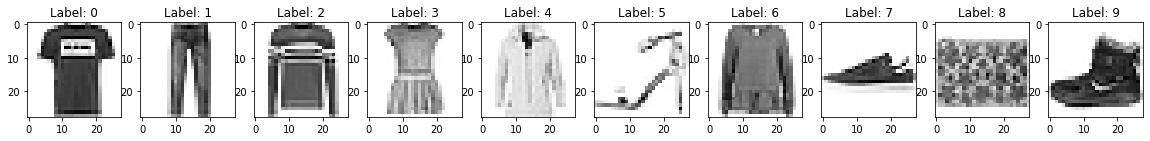

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 
# Only use this if using iPython
plt.figure(figsize = (20,4)) # set area of plot 20 inch width 4 inch height
no = 1
for index in labels:
  plt.subplot(1,10,no) #subplot(row,column,index)
  plt.imshow(np.reshape(train_images[index],(28,28)), cmap='Greys')#cmap=plt.cm.gray
  plt.title('Label: {}'.format(train_labels[index]))
  no += 1

# **(b)**

flatten images and normalize data

In [0]:
train_flat = np.zeros(shape=(60000,784)) 
test_flat = np.zeros(shape=(10000,784))
for i in range(60000):
  train_flat[i] = train_images[i].flatten()
for i in range(10000):  
  test_flat[i] = test_images[i].flatten()
#print(train_flat[1])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#normalize data
train_flat = scaler.fit_transform(train_flat)
test_flat = scaler.fit_transform(test_flat)  

#K-NN

In [0]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(3)
clf.fit(train_flat, train_labels)
%time clf.score(test_flat, test_labels)

CPU times: user 16min 47s, sys: 73.8 ms, total: 16min 47s
Wall time: 16min 49s


0.8499

#Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

logisticReg = LogisticRegression(penalty = 'l2', tol = 0.1,solver = 'saga',C=0.001)
%time logisticReg.fit(train_flat,train_labels)

CPU times: user 13.9 s, sys: 1.44 ms, total: 13.9 s
Wall time: 13.9 s


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.1, verbose=0,
                   warm_start=False)

In [0]:
score = logisticReg.score(test_flat,test_labels)
print(score)

0.8235


#SVMs


In [0]:
from sklearn import svm
svc = svm.SVC(kernel = 'linear',C=3,probability=False)
%time svc.fit(train_flat,train_labels)


CPU times: user 1h 16min 41s, sys: 744 ms, total: 1h 16min 42s
Wall time: 1h 16min 53s


SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
%time svc.score(test_flat, test_labels)

CPU times: user 3min 44s, sys: 19 ms, total: 3min 44s
Wall time: 3min 45s


0.8357

In [0]:
svmrbf  = svm.SVC(probability=False,kernel='rbf',C=5)
%time svmrbf.fit(train_flat,train_labels)

CPU times: user 14min 21s, sys: 294 ms, total: 14min 22s
Wall time: 14min 25s


SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
%time svmrbf.score(test_flat, test_labels)

CPU times: user 4min 35s, sys: 38.7 ms, total: 4min 35s
Wall time: 4min 35s


0.8965